In [1]:
import os
from joblib import Parallel, delayed
import time
import numpy as np

In [2]:
# time.sleep(30)

In [3]:
with open('all_external_ips') as f:
    lines = f.read().splitlines()


lines = [x for x in lines if x!='None']
lines

for ip in lines:
    if ip!='None':
        current = (ip.split('.'))

        print('ssh -i "MAKWest.pem" ubuntu@ec2-'+str(current[0])+'-'\
              +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.us-west-1.compute.amazonaws.com')

ssh -i "MAKWest.pem" ubuntu@ec2-127-0-0-1.us-west-1.compute.amazonaws.com
ssh -i "MAKWest.pem" ubuntu@ec2-127-0-0-1.us-west-1.compute.amazonaws.com
ssh -i "MAKWest.pem" ubuntu@ec2-127-0-0-1.us-west-1.compute.amazonaws.com
ssh -i "MAKWest.pem" ubuntu@ec2-127-0-0-1.us-west-1.compute.amazonaws.com
ssh -i "MAKWest.pem" ubuntu@ec2-127-0-0-1.us-west-1.compute.amazonaws.com
ssh -i "MAKWest.pem" ubuntu@ec2-127-0-0-1.us-west-1.compute.amazonaws.com
ssh -i "MAKWest.pem" ubuntu@ec2-127-0-0-1.us-west-1.compute.amazonaws.com
ssh -i "MAKWest.pem" ubuntu@ec2-127-0-0-1.us-west-1.compute.amazonaws.com
ssh -i "MAKWest.pem" ubuntu@ec2-127-0-0-1.us-west-1.compute.amazonaws.com
ssh -i "MAKWest.pem" ubuntu@ec2-127-0-0-1.us-west-1.compute.amazonaws.com


## Set number of clusters

In [4]:
nclusters = 0

for folder in os.listdir('.'):
    if 'config' in folder and folder!='config':
        nclusters = nclusters + 1
        
        
print(nclusters)


total_count = 8


nreplicas = int(total_count/nclusters)
nodeIps = lines[:nclusters* nreplicas]

nclients = 2

# no_cluster_yet_nodes = lines[nclusters* nreplicas:-(nclusters)]
no_cluster_yet_nodes = lines[nclusters* nreplicas:-nclients]




# clientIps = lines[-(nclusters):]
clientIps = lines[-nclients:]



2


In [5]:
clientIps, no_cluster_yet_nodes

(['127.0.0.1', '127.0.0.1'], [])

## Functions

In [6]:
def setup(i):

    ip = lines[i]
    if ip!='None':
        current = (ip.split('.'))
        command = 'scp -o StrictHostKeyChecking=no -i /home/tejas/Downloads/MAKWest.pem '+'commands.sh'+' ubuntu@ec2-'+str(current[0])+'-'\
              +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.us-west-1.compute.amazonaws.com:commands.sh'
        
        
        os.system(command)

        
def compile_job(i):
    ip = lines[i]
    if ip!='None':
        current = (ip.split('.'))
        command = 'echo 3108 | sudo -S ./gradlew installDist'
        
        
        os.system(command)

        
        
def clean_job(i):
    ip = lines[i]
    
#     rm_command = 'sudo rm config/currentView; '
#     for iter_ in range(nclusters):
#         rm_command = rm_command + 'rm config'+str(iter_)+'/currentView; '
        
    
    if ip!='None':
        current = (ip.split('.'))
        command = 'echo 3108 | sudo -S rm ../dump_files/nohup*.out; echo 1234 | sudo -S rm config*/currentView;'
        
        
        os.system(command)
        
        

        
def run_server_node(i):
    ip = lines[i]
#     if ip!='None' and( ip in nodeIps or ip in no_cluster_yet_nodes):
    if ip!='None' and( ip in nodeIps):
        
        current = (ip.split('.'))
        command = 'nohup ./runscripts/startReplicaYCSB.sh '+str(i)+' >../dump_files/nohup_s'+str(i)+'.out 2>&1 & echo $! > ../dump_files/jobID_s'+str(i)+'.txt'
        
        
        os.system(command)
        
        
        
    if ip!='None' and( ip in no_cluster_yet_nodes):
        
        current = (ip.split('.'))
        command = 'nohup ./runscripts/startReplicaYCSB.sh '+str(i)+' >../dump_files/nohup_s'+str(i)+'.out 2>&1 &'
        
        
        os.system(command)        
#         print(command)



def run_basic_client(i):
    cmd_arg = ''
    
    ip = lines[i]
    if ip!='None' and ip in clientIps:
#     if ip!='None' and ip in nodeIps[1:1+len(clientIps)]:
        
        current = (ip.split('.'))
        
#         cmd_arg = nodeIps[1:1+len(clientIps)].index(ip)
        
        for iter__ in range(len(clientIps)):
            if ip==clientIps[iter__]:
                cmd_arg = iter__
                
                
        
#         print(i, cmd_arg)
            
        current = (ip.split('.'))
        command = 'nohup ./runscripts/ycsbClient.sh '+str(i-len(nodeIps)-len(no_cluster_yet_nodes))+' >../dump_files/nohup_c'+str(i)+'.out 2>&1 &'

        
        os.system(command)


def kill_java(i):
    ip = lines[i]
    
    if ip!='None':
        current = (ip.split('.'))
        command = ' killall java; killall nohup'
        
        
        os.system(command)
        
        
        
def kill_clients(i):
    ip = lines[i]
    if ip!='None' and ip in clientIps:
        current = (ip.split('.'))
        command = 'killall java;  killall nohup"'
        
        
        os.system(command)

def run_server_node_check(i):
    ip = lines[i]
#     if ip!='None' and( ip in nodeIps or ip in no_cluster_yet_nodes):
    if ip!='None' and( ip in nodeIps):
        
        current = (ip.split('.'))
        command = ' nohup ./runscripts/startReplicaYCSB.sh '+str(i)+' >../dump_files/nohup_s'+str(i)+'.out 2>&1 &'
        
        
        print(command)
        
        

# for i in range(len(lines)):
#     run_server_node_check(i)

def run_basic_client_check(i):
    cmd_arg = ''
    
    ip = lines[i]
    if ip!='None' and ip in clientIps:
        
        for iter__ in range(len(clientIps)):
            if ip==clientIps[iter__]:
                cmd_arg = iter__
                
                
        
#         print(i, cmd_arg)
            
        current = (ip.split('.'))
        command = 'nohup ./runscripts/ycsbClient.sh '+str(cmd_arg)+' >../dump_files/nohup_c'+str(i)+'.out 2>&1 &'

        
        print(command)

# for i in range(len(lines)):
#     run_basic_client_check(i)



def join_node1(i):
    ip = lines[i]
    if ip!='None':
        
        current = (ip.split('.'))
        command = 'nohup  ./runscripts/smartrun.sh bftsmart.reconfiguration.util.DefaultVMServices '+str(i)+' 127.0.0.1 11080 11081 config0 >../dump_files/nohup_j'+str(i)+'.out 2>&1 &'
        
        
        os.system(command)   
        
        
def join_node2(i):
    ip = lines[i]
    if ip!='None':
        
        current = (ip.split('.'))
        command = 'nohup  ./runscripts/smartrun.sh bftsmart.reconfiguration.util.DefaultVMServices '+str(i)+' 127.0.0.1 11090 11091 config0 >../dump_files/nohup_j'+str(i)+'.out 2>&1 &'
        
        
        os.system(command) 
        
def join_node3(i):
    ip = lines[i]
    if ip!='None':
        
        current = (ip.split('.'))
        command = 'nohup  ./runscripts/smartrun.sh bftsmart.reconfiguration.util.DefaultVMServices '+str(i)+' 127.0.0.1 11100 11101 config0 >../dump_files/nohup_j'+str(i)+'.out 2>&1 &'
        
        
        os.system(command) 

## Compile Job

## Setup Client and nodeIPS

In [7]:
len(lines)

10

In [8]:
len(nodeIps), len(clientIps)

(8, 2)

## RUN SERVERS

In [9]:
for i in range(len(lines)):
    kill_java(i)

for i in range(len(lines)):
    clean_job(i)
    
compile_job(1)



java(4449): Operation not permitted
java(5679): Operation not permitted
java(5969): Operation not permitted
java: no process found
nohup: no process found
java(4449): Operation not permitted
java(5679): Operation not permitted
java(5969): Operation not permitted
java: no process found
nohup: no process found
java(4449): Operation not permitted
java(5679): Operation not permitted
java(5969): Operation not permitted
java: no process found
nohup: no process found
java(4449): Operation not permitted
java(5679): Operation not permitted
java(5969): Operation not permitted
java: no process found
nohup: no process found
java(4449): Operation not permitted
java(5679): Operation not permitted
java(5969): Operation not permitted
java: no process found
nohup: no process found
java(4449): Operation not permitted
java(5679): Operation not permitted
java(5969): Operation not permitted
java: no process found
nohup: no process found
java(4449): Operation not permitted
java(5679): Operation not permitte


> Task :compileJava

> Task :processResources NO-SOURCE
> Task :classes
> Task :jar
> Task :installDist

BUILD SUCCESSFUL in 956ms
3 actionable tasks: 3 executed


Note: Some input files use unchecked or unsafe operations.
Note: Recompile with -Xlint:unchecked for details.


In [10]:
    
for i in range(len(lines)-nclients-len(no_cluster_yet_nodes)):
    print(i)
    run_server_node(i)

0
1
2
3
4
5
6
7


In [11]:
time.sleep(30)
!tail ../dump_files/nohup_s0.out -n 50

-- <-- receiving, msg:bftsmart.statemanagement.standard.StandardSMMessage@3ff44d62 with it being OtherClusterMessage=false
-- currentConsensusIdAsked activated
-- Received CID query from 3 with ID 4
-- Going to send back response to CID query with CID: -1
-- --> 3: sending SystemMessage message from: bftsmart.statemanagement.standard.StandardSMMessage@2ea592d3 -> [3]
-- Sending message from:0 -> to:3.
-- Sent CID reply to replica 3 with ID 4
-- Tejas: Sending CID query with ID 4 to replicas [1, 2, 3]
-- --> 3: sending SystemMessage message from: bftsmart.statemanagement.standard.StandardSMMessage@3e08ff24 -> [1, 2, 3]
-- Sending message from:0 -> to:1.
-- Sending message from:0 -> to:2.
-- Sending message from:0 -> to:3.
-- <-- receiving, msg:bftsmart.statemanagement.standard.StandardSMMessage@21b6eca4 with it being OtherClusterMessage=false
-- currentConsensusIdReceived activated
-- Received  CID reply from replica ( or smsg.getSender()) 3 with smsg.getCID() 5 (expecting queryID 5),  

In [12]:


# for i in range(len(lines)):
#     kill_java(i)

In [13]:
len(nodeIps)+len(no_cluster_yet_nodes)+len(clientIps)


10

## Run basic client

In [14]:
for i in range(len(nodeIps)+len(no_cluster_yet_nodes),len(nodeIps)+len(no_cluster_yet_nodes)+len(clientIps)):
    run_basic_client(i)

In [15]:
time.sleep(70)
time.sleep(110)


In [16]:

# time.sleep(30)
# run_server_node(8)
# time.sleep(15)
# join_node1(8)

# time.sleep(30)
# run_server_node(9)

# time.sleep(30)
# join_node2(9)

# time.sleep(30)
# run_server_node(10)
# time.sleep(30)
# join_node3(10)

In [17]:
# time.sleep(50)

# run_server_node(9)

# time.sleep(160)
# join_node2(9)


# for i in [2]:
#     os.system('kill -9 `cat ../dump_files/jobID_s2.txt`')
    


# time.sleep(80)



for i in range(len(lines)):
    kill_java(i)
    


java(4449): Operation not permitted
java(5679): Operation not permitted
java(5969): Operation not permitted
nohup: no process found
java(4449): Operation not permitted
java(5679): Operation not permitted
java(5969): Operation not permitted
nohup: no process found
java(4449): Operation not permitted
java(5679): Operation not permitted
java(5969): Operation not permitted
nohup: no process found
java(4449): Operation not permitted
java(5679): Operation not permitted
java(5969): Operation not permitted
nohup: no process found
java(4449): Operation not permitted
java(5679): Operation not permitted
java(5969): Operation not permitted
nohup: no process found
java(4449): Operation not permitted
java(5679): Operation not permitted
java(5969): Operation not permitted
nohup: no process found
java(4449): Operation not permitted
java(5679): Operation not permitted
java(5969): Operation not permitted
nohup: no process found
java(4449): Operation not permitted
java(5679): Operation not permitted
java

In [18]:
# for i in range(len(lines)):
#     kill_java(i)

## Main Job

In [19]:

def getTimesThputs(file):
    f = open(file, "r")
    data = f.readlines() 
    times = []
    thputs = []
    latencies = []
    for line in data:
#         print(line)
        if not line.startswith('--') and 'current ops/sec; ' in line and 'AverageLatency(us)=' in line and not 'JVM' in line:

#         print(line)
            times.append(line.split('sec:')[0].strip())
            thputs.append(line.split(';')[1].split('current')[0].strip())


            read_lat = '0'
            write_lat = '0'

            if ('READ AverageLatency' in line):

                print(line)

                read_lat = line.split('READ AverageLatency(us)=')[1].split(']')[0].strip()


            if ('UPDATE AverageLatency' in line):                    

                write_lat = line.split('UPDATE AverageLatency(us)=')[1].split(']')[0].strip()


            if (('READ AverageLatency' not in line) and ('UPDATE AverageLatency' not in line)):
                latencies.append(line.split('=')[1].split(']')[0].strip())
            else:
                read_frac = 0
                write_frac = 0

                if float(read_lat) > 0:
                    read_frac = 0.85

                if float(write_lat) > 0:
                    write_frac = 0.15

#                         print(line, write_frac, read_frac, float(read_lat), float(write_lat))

                lat = str( (write_frac * float(write_lat) +\
                            read_frac*float(read_lat))/(write_frac+read_frac)\
                         )
                latencies.append(lat)

            print(line,latencies[-1],thputs[-1],times[-1])

    return np.array(times).astype(float), np.array(thputs).astype(float), np.array(latencies).astype(float)/1e6  


In [20]:
## Byzantine Remote View Change

In [21]:
times ,thputs, lats = getTimesThputs('../dump_files/nohup_c'+str(len(nodeIps)+len(no_cluster_yet_nodes))+'.out')
times2 ,thputs2, lats = getTimesThputs('../dump_files/nohup_c'+str(len(nodeIps)+len(no_cluster_yet_nodes)+1)+'.out')


'../dump_files/nohup_c'+str(len(nodeIps)+len(no_cluster_yet_nodes))+'.out'

 1 sec: 7 operations; 6.94 current ops/sec; [UPDATE AverageLatency(us)=86131.71] 
 86131.71 6.94 1
 2 sec: 32 operations; 24.95 current ops/sec; [UPDATE AverageLatency(us)=40063] 
 40063.0 24.95 2
 3 sec: 60 operations; 27.97 current ops/sec; [UPDATE AverageLatency(us)=36122] 
 36122.0 27.97 3
 4 sec: 92 operations; 32 current ops/sec; [UPDATE AverageLatency(us)=30927.81] 
 30927.810000000005 32 4
 5 sec: 133 operations; 40.96 current ops/sec; [UPDATE AverageLatency(us)=24395.51] 
 24395.51 40.96 5
 6 sec: 171 operations; 38 current ops/sec; [UPDATE AverageLatency(us)=26678.53] 
 26678.53 38 6
 7 sec: 226 operations; 54.95 current ops/sec; [UPDATE AverageLatency(us)=17878.56] 
 17878.56 54.95 7
 8 sec: 315 operations; 89 current ops/sec; [UPDATE AverageLatency(us)=11342.51] 
 11342.51 89 8
 9 sec: 398 operations; 82.92 current ops/sec; [UPDATE AverageLatency(us)=11865.83] 
 11865.83 82.92 9
 10 sec: 486 operations; 88 current ops/sec; [UPDATE AverageLatency(us)=11353.3] 
 11353.3 88 10

'../dump_files/nohup_c8.out'

In [22]:
# times - times2

In [23]:
# thputs = thputs + thputs2

In [24]:
# np.mean(lats[20:]) # 23604.83205128205

In [25]:
np.mean(lats[20:])

0.006998636163522013

In [26]:
lats

array([0.09707943, 0.04037764, 0.03593593, 0.03098184, 0.02430383,
       0.02668589, 0.0179334 , 0.01130567, 0.01189434, 0.01133967,
       0.01029793, 0.01030453, 0.00904336, 0.00880325, 0.00833673,
       0.00778042, 0.00705988, 0.00902583, 0.00729075, 0.00718391,
       0.00707348, 0.00777566, 0.00657648, 0.00650401, 0.00704805,
       0.00682255, 0.00710981, 0.0081336 , 0.00877327, 0.00672343,
       0.00675599, 0.00750776, 0.00773632, 0.00809091, 0.00879399,
       0.00789826, 0.00821817, 0.00677047, 0.00655378, 0.0070659 ,
       0.00718298, 0.00660175, 0.00680426, 0.00664373, 0.00707285,
       0.00838549, 0.00771612, 0.01251334, 0.0096897 , 0.00775169,
       0.00653292, 0.00643668, 0.00657712, 0.00685789, 0.0077653 ,
       0.00801557, 0.00745272, 0.00710906, 0.00630634, 0.00638452,
       0.00654714, 0.00673682, 0.00777564, 0.00773499, 0.00637669,
       0.00642628, 0.00627411, 0.00626647, 0.00647856, 0.00634311,
       0.00901784, 0.00634474, 0.00618812, 0.00623486, 0.00634

In [27]:
# import pylab as pl

# pl.figure(figsize = (12,8))
# pl.rcParams.update({'font.size': 17})
# pl.plot(times[:], thputs[:], '-o', label='BfTSmart-MC')


# pl.title(r'Throughput')

# # pl.axvline(FailTimes[0], label = '1st fail', ls = '--', color = 'r')
# # pl.axvline(FailTimes[1], label = '2nd fail', ls = '--', color = 'g')
# # pl.axvline(JoinTimes[2], label = '3rd join', ls = '--', color = 'b')
# # pl.axvline(JoinTimes[3], label = '4th join', ls = '--', color = 'orange')

# pl.xlabel('Time (s)')
# pl.ylabel('Throughput (Txn/s)')
# pl.legend()
# # pl.savefig('../Experiments/RemoteViewChange.png', dpi = 150)
# pl.show()
# pl.clf()


In [28]:
# import pylab as pl

# pl.figure(figsize = (12,8))
# # pl.rcParams.update({'font.size': 17})
# pl.plot(times[:], thputs[:], '-o', label='BfTSmart-MC')


# # pl.title(r'Joins Throughput')

# # pl.axvline(FailTimes[0], label = '1st fail', ls = '--', color = 'r')
# # pl.axvline(FailTimes[1], label = '2nd fail', ls = '--', color = 'g')
# # pl.axvline(JoinTimes[2], label = '3rd join', ls = '--', color = 'b')
# # pl.axvline(JoinTimes[3], label = '4th join', ls = '--', color = 'orange')

# pl.xlabel('Time (s)')
# pl.ylabel('Throughput (Txn/s)')
# pl.legend()
# # pl.savefig('../Experiments/RemoteViewChange.png', dpi = 150)
# pl.show()
# pl.clf()


In [29]:
times_new = [x for x in range(180)]
thputs_new = [0 for x in range(180)]
for idx, t in enumerate(times):
    thputs_new[int(t)] = thputs[idx]
    

times_new, thputs_new

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,
  15

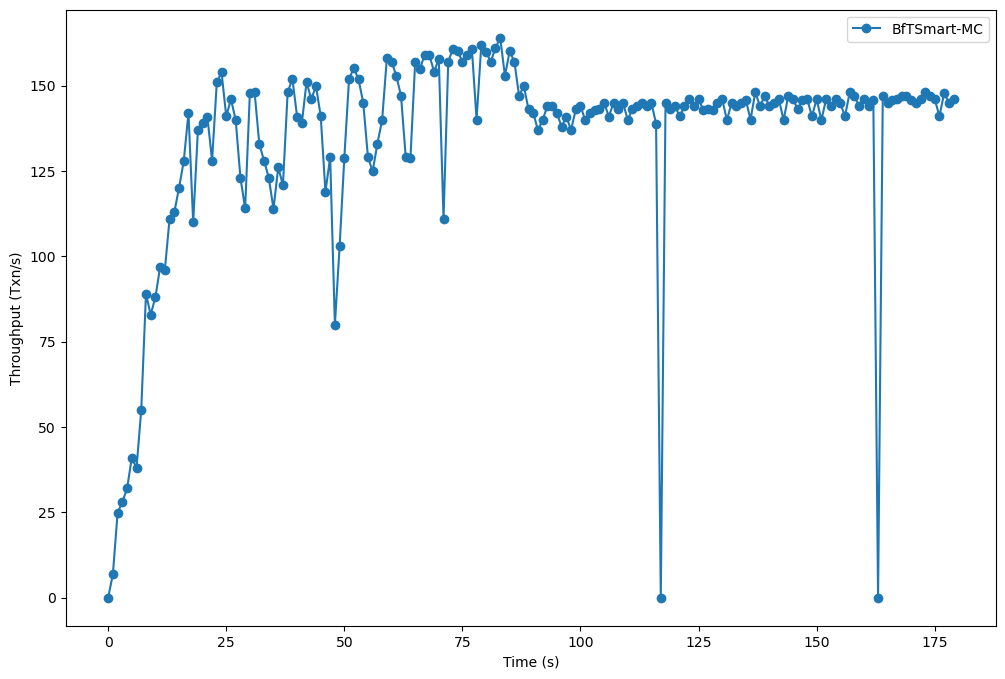

<Figure size 640x480 with 0 Axes>

In [30]:
import pylab as pl

pl.figure(figsize = (12,8))
# pl.rcParams.update({'font.size': 17})
pl.plot(times_new[:], thputs_new[:], '-o', label='BfTSmart-MC')


# pl.title(r'Joins Throughput')

# pl.axvline(FailTimes[0], label = '1st fail', ls = '--', color = 'r')
# pl.axvline(FailTimes[1], label = '2nd fail', ls = '--', color = 'g')
# pl.axvline(JoinTimes[2], label = '3rd join', ls = '--', color = 'b')
# pl.axvline(JoinTimes[3], label = '4th join', ls = '--', color = 'orange')

pl.xlabel('Time (s)')
pl.ylabel('Throughput (Txn/s)')
pl.legend()
# pl.savefig('../Experiments/RemoteViewChange.png', dpi = 150)
pl.show()
pl.clf()


In [31]:
(thputs), np.sum(thputs)

(array([  6.94,  24.95,  27.97,  32.  ,  40.96,  38.  ,  54.95,  89.  ,
         82.92,  88.  ,  96.9 ,  96.  , 111.  , 112.89, 120.  , 127.87,
        142.  , 109.89, 137.  , 139.  , 140.86, 128.  , 151.  , 153.85,
        141.  , 146.  , 139.86, 123.  , 114.  , 147.85, 148.  , 132.87,
        128.  , 123.  , 113.89, 126.  , 120.88, 148.  , 152.  , 140.86,
        139.  , 151.  , 146.  , 149.85, 141.  , 118.88, 129.  ,  79.92,
        102.9 , 128.87, 152.  , 155.  , 151.85, 145.  , 129.  , 124.88,
        133.  , 139.86, 158.  , 157.  , 152.85, 147.  , 129.  , 128.87,
        157.  , 154.85, 159.  , 159.  , 154.  , 157.84, 111.  , 157.  ,
        160.84, 160.  , 157.  , 159.  , 160.84, 140.  , 162.  , 159.84,
        157.  , 161.  , 164.  , 152.85, 160.  , 157.  , 147.  , 149.85,
        143.  , 142.  , 136.86, 140.  , 144.  , 144.  , 141.86, 138.  ,
        140.86, 137.  , 143.  , 144.  , 139.86, 142.  , 142.86, 143.  ,
        145.  , 140.86, 145.  , 143.  , 144.86, 140.  , 143.  , 

In [32]:
# import pylab as pl

# pl.figure(figsize = (12,8))
# pl.rcParams.update({'font.size': 17})
# pl.plot(times[:], thputs[:], '-o', label='BfTSmart-MC')


# pl.title(r'Joins Throughput')

# # pl.axvline(FailTimes[0], label = '1st fail', ls = '--', color = 'r')
# # pl.axvline(FailTimes[1], label = '2nd fail', ls = '--', color = 'g')
# # pl.axvline(JoinTimes[2], label = '3rd join', ls = '--', color = 'b')
# # pl.axvline(JoinTimes[3], label = '4th join', ls = '--', color = 'orange')

# pl.xlabel('Time (s)')
# pl.ylabel('Throughput (Txn/s)')
# pl.legend()
# # pl.savefig('../Experiments/RemoteViewChange.png', dpi = 150)
# pl.show()
# pl.clf()
